In [39]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
cardiac_features = pd.read_csv('ECG_Cardiac_Features.csv')
cardiac_features.drop(columns=['Patient_ID'], inplace=True)
fourier_features = pd.read_csv('ECG_Fourier_Transform_Features.csv')
fourier_features.drop(columns=['Patient_ID', 'Label'], inplace=True)
time_features = pd.read_csv('ECG_Time_Features.csv')

hilbert_features = pd.read_csv('ECG_Hilbert_Features.csv')

merged_features = pd.merge(cardiac_features, fourier_features, on='ecg_id', how='inner')
merged_features = pd.merge(merged_features, time_features, on='ecg_id', how='inner')
merged_features = pd.merge(merged_features, hilbert_features, on='ecg_id', how='inner')

merged_features.head()

,ecg_id,Label,Heart Rate,HRV_MeanNN,HRV_SDNN,HRV_RMSSD,HRV_pNN50,QRS_duration,PR_duration,RR Interval Mean,...,mean_amplitude_max,mean_amplitude_std,std_amplitude_mean,std_amplitude_max,std_amplitude_std,qrs_amplitude_mean,qrs_amplitude_max,qrs_amplitude_std,Phase Locking Value,Phase Duration
0,1,NORM,63.847119,940.000000,17.320508,22.627417,0.000000,141.714286,127.333333,940.000000,...,0.141135,0.018233,0.096241,0.104166,0.006757,0.179152,0.219571,0.019721,0.999996,7.034
1,2,NORM,47.838174,1258.285714,82.836615,54.546616,42.857143,174.285714,152.000000,1258.285714,...,0.176487,0.017505,0.114857,0.143277,0.016411,0.206247,0.232510,0.022552,0.998820,6.782
2,3,NORM,63.822587,940.444444,20.019435,17.606817,0.000000,130.750000,114.500000,940.444444,...,0.126937,0.006781,0.121469,0.132664,0.007027,0.216436,0.234370,0.018504,1.000000,7.134
3,4,NORM,75.152692,800.545455,45.511237,35.185224,9.090909,160.727273,110.000000,800.545455,...,0.163980,0.008008,0.127177,0.147120,0.009429,0.230262,0.250277,0.014107,0.999995,7.474
4,5,NORM,66.456900,905.200000,51.018080,57.271284,50.000000,NaN,122.000000,905.200000,...,0.094065,0.004519,0.077827,0.088043,0.004950,0.145751,0.165159,0.013266,0.999992,7.180


In [13]:
print(merged_features.columns)
print(merged_features.shape)

Index(['ecg_id', 'Label', 'Heart Rate', 'HRV_MeanNN', 'HRV_SDNN', 'HRV_RMSSD',
       'HRV_pNN50', 'QRS_duration', 'PR_duration', 'RR Interval Mean',
       ...
       'mean_amplitude_max', 'mean_amplitude_std', 'std_amplitude_mean',
       'std_amplitude_max', 'std_amplitude_std', 'qrs_amplitude_mean',
       'qrs_amplitude_max', 'qrs_amplitude_std', 'Phase Locking Value',
       'Phase Duration'],
      dtype='object', length=101)
(20773, 101)


In [14]:
feature_columns = [col for col in merged_features.columns if col not in ['ecg_id', 'Label']]

for col in feature_columns:
    print(f"{col}: {merged_features[col].isna().sum()} missing values")

Heart Rate: 1 missing values
HRV_MeanNN: 0 missing values
HRV_SDNN: 0 missing values
HRV_RMSSD: 0 missing values
HRV_pNN50: 0 missing values
QRS_duration: 2807 missing values
PR_duration: 3215 missing values
RR Interval Mean: 0 missing values
RR Interval SD: 0 missing values
RR Interval RMSSD: 0 missing values
RR Interval Min: 0 missing values
RR Interval Max: 0 missing values
QT Interval Mean: 197 missing values
QT Interval SD: 197 missing values
ST Segment Amplitude Mean: 185 missing values
ST Segment Amplitude SD: 185 missing values
ST Segment Duration Mean: 185 missing values
ST Segment Duration SD: 185 missing values
Dominant Frequency: 0 missing values
Frequency Power Sum: 0 missing values
Mean Frequency: 0 missing values
Spectral Entropy: 0 missing values
MFCC_1: 0 missing values
MFCC_2: 0 missing values
MFCC_3: 0 missing values
MFCC_4: 0 missing values
MFCC_5: 0 missing values
MFCC_6: 0 missing values
MFCC_7: 0 missing values
MFCC_8: 0 missing values
MFCC_9: 0 missing values
MF

In [15]:
classes = list(merged_features['Label'].unique())

feature_columns = [col for col in merged_features.columns if col not in ['ecg_id', 'Label']]

for col in feature_columns:
    merged_features[col] = merged_features.groupby('Label')[col].transform(
        lambda x: x.fillna(x.mean())
    )

In [16]:
feature_columns = [col for col in merged_features.columns if col not in ['ecg_id', 'Label']]

for col in feature_columns:
    print(f"{col}: {merged_features[col].isna().sum()} missing values")

Heart Rate: 0 missing values
HRV_MeanNN: 0 missing values
HRV_SDNN: 0 missing values
HRV_RMSSD: 0 missing values
HRV_pNN50: 0 missing values
QRS_duration: 0 missing values
PR_duration: 0 missing values
RR Interval Mean: 0 missing values
RR Interval SD: 0 missing values
RR Interval RMSSD: 0 missing values
RR Interval Min: 0 missing values
RR Interval Max: 0 missing values
QT Interval Mean: 0 missing values
QT Interval SD: 0 missing values
ST Segment Amplitude Mean: 0 missing values
ST Segment Amplitude SD: 0 missing values
ST Segment Duration Mean: 0 missing values
ST Segment Duration SD: 0 missing values
Dominant Frequency: 0 missing values
Frequency Power Sum: 0 missing values
Mean Frequency: 0 missing values
Spectral Entropy: 0 missing values
MFCC_1: 0 missing values
MFCC_2: 0 missing values
MFCC_3: 0 missing values
MFCC_4: 0 missing values
MFCC_5: 0 missing values
MFCC_6: 0 missing values
MFCC_7: 0 missing values
MFCC_8: 0 missing values
MFCC_9: 0 missing values
MFCC_10: 0 missing v

In [17]:
X = merged_features[feature_columns]
y = merged_features['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Accuracy: 0.6181001283697047


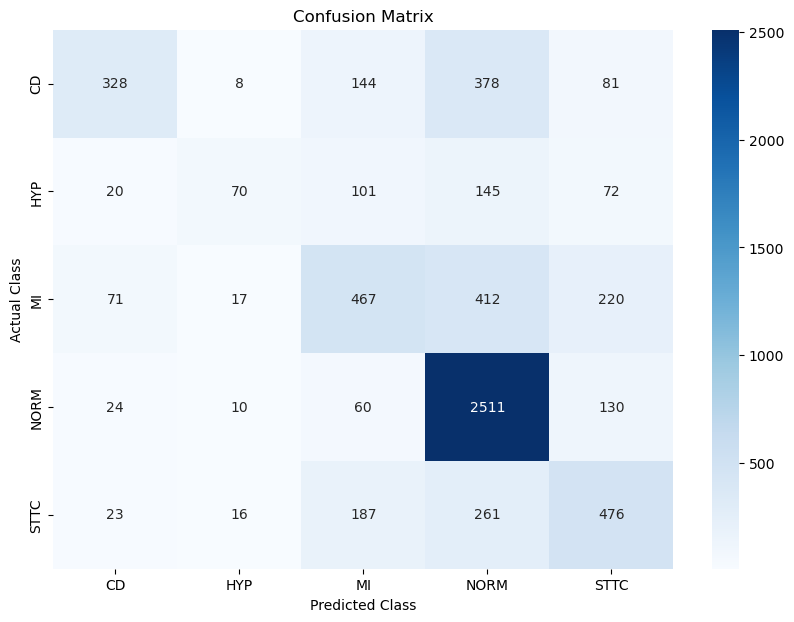

In [18]:
rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy_rf)

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
labels = sorted(set(y_test) | set(y_pred))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)

# Adding labels, title, and formatting
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Confusion Matrix")
plt.show()

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          CD       0.70      0.35      0.47       939
         HYP       0.58      0.17      0.26       408
          MI       0.49      0.39      0.44      1187
        NORM       0.68      0.92      0.78      2735
        STTC       0.49      0.49      0.49       963

    accuracy                           0.62      6232
   macro avg       0.59      0.47      0.49      6232
weighted avg       0.61      0.62      0.59      6232



In [20]:
feature_importances = rf.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

top_50_features = importance_df.head(50)

# Display top 509 features
print(top_50_features)

                                              Feature  Importance
35                             value__quantile__q_0.9    0.029045
14                          ST Segment Amplitude Mean    0.020121
12                                   QT Interval Mean    0.019548
13                                     QT Interval SD    0.016894
6                                         PR_duration    0.016513
60                   value__ratio_beyond_r_sigma__r_3    0.016352
61                 value__ratio_beyond_r_sigma__r_0.5    0.016210
80              value__partial_autocorrelation__lag_4    0.015596
21                                   Spectral Entropy    0.015582
36                             value__quantile__q_0.6    0.015370
33                                            MFCC_12    0.014161
44  value__change_quantiles__f_agg_"var"__isabs_Tr...    0.014089
79              value__partial_autocorrelation__lag_3    0.014049
66                                      value__median    0.013827
5         

In [29]:
encoder = OneHotEncoder()
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1)).toarray()
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1)).toarray()

xgboost = XGBClassifier(n_estimators=500, random_state=42)
xgboost.fit(X_train, y_train_encoded)

y_pred = xgboost.predict(X_test)
accuracy_xgboost = accuracy_score(y_test_encoded, y_pred)
print('Accuracy:', accuracy_xgboost)

Accuracy: 0.5659499358151476


In [30]:
print(classification_report(y_test_encoded, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.43      0.57       939
           1       0.92      0.36      0.52       408
           2       0.76      0.39      0.51      1187
           3       0.77      0.81      0.79      2735
           4       0.67      0.38      0.49       963

   micro avg       0.77      0.58      0.66      6232
   macro avg       0.79      0.47      0.58      6232
weighted avg       0.77      0.58      0.64      6232
 samples avg       0.57      0.58      0.57      6232



/Users/noeltiju/miniforge3/envs/machinelearning/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [35]:
for label in classes:
    dataset_label = merged_features[(merged_features['Label'] == label) | (merged_features['Label'] == 'NORM')]
    X_label = dataset_label[feature_columns]
    y_label = dataset_label['Label']

    X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.3, random_state=42)

    scaler = StandardScaler()
    X_train_label = scaler.fit_transform(X_train_label)
    X_test_label = scaler.transform(X_test_label)

    rf = RandomForestClassifier(n_estimators=500, random_state=42)
    rf.fit(X_train_label, y_train_label)

    y_pred = rf.predict(X_test_label)
    accuracy_rf = accuracy_score(y_test_label, y_pred)
    print(f'Accuracy for {label}:', accuracy_rf)

    print(classification_report(y_test_label, y_pred))
    


Accuracy for NORM: 1.0
              precision    recall  f1-score   support

        NORM       1.00      1.00      1.00      2722

    accuracy                           1.00      2722
   macro avg       1.00      1.00      1.00      2722
weighted avg       1.00      1.00      1.00      2722

Accuracy for MI: 0.8414882772680938
              precision    recall  f1-score   support

          MI       0.83      0.62      0.71      1209
        NORM       0.85      0.94      0.89      2715

    accuracy                           0.84      3924
   macro avg       0.84      0.78      0.80      3924
weighted avg       0.84      0.84      0.83      3924

Accuracy for STTC: 0.8784186298402383
              precision    recall  f1-score   support

        NORM       0.90      0.94      0.92      2743
        STTC       0.80      0.70      0.75       950

    accuracy                           0.88      3693
   macro avg       0.85      0.82      0.83      3693
weighted avg       0.88      0.

/var/folders/9p/bh_jcz_s23517ylfyg0g3jj00000gn/T/ipykernel_3758/3795644261.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_features['Cluster'] = clusters
/var/folders/9p/bh_jcz_s23517ylfyg0g3jj00000gn/T/ipykernel_3758/3795644261.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_features['PCA1'] = X_pca[:, 0]
/var/folders/9p/bh_jcz_s23517ylfyg0g3jj00000gn/T/ipykernel_3758/3795644261.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, wh

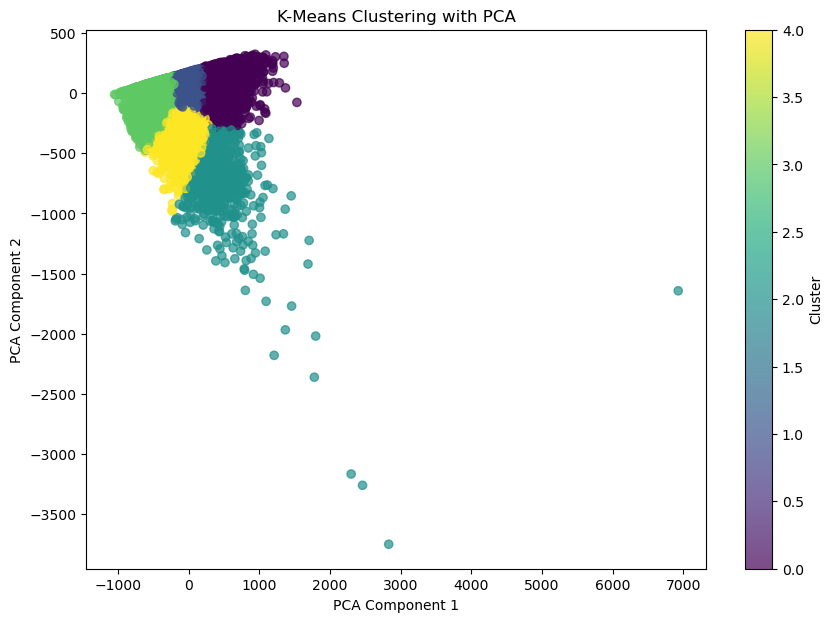

In [42]:
features_clustering = list(cardiac_features.columns); 
features_clustering.remove('ecg_id')
features_clustering.remove('Label')

X = merged_features[features_clustering]
y = merged_features['Label']

kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X)

# Add the clusters to the dataframe for visualization
merged_features['Cluster'] = clusters

# Perform PCA for visualization (if needed)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

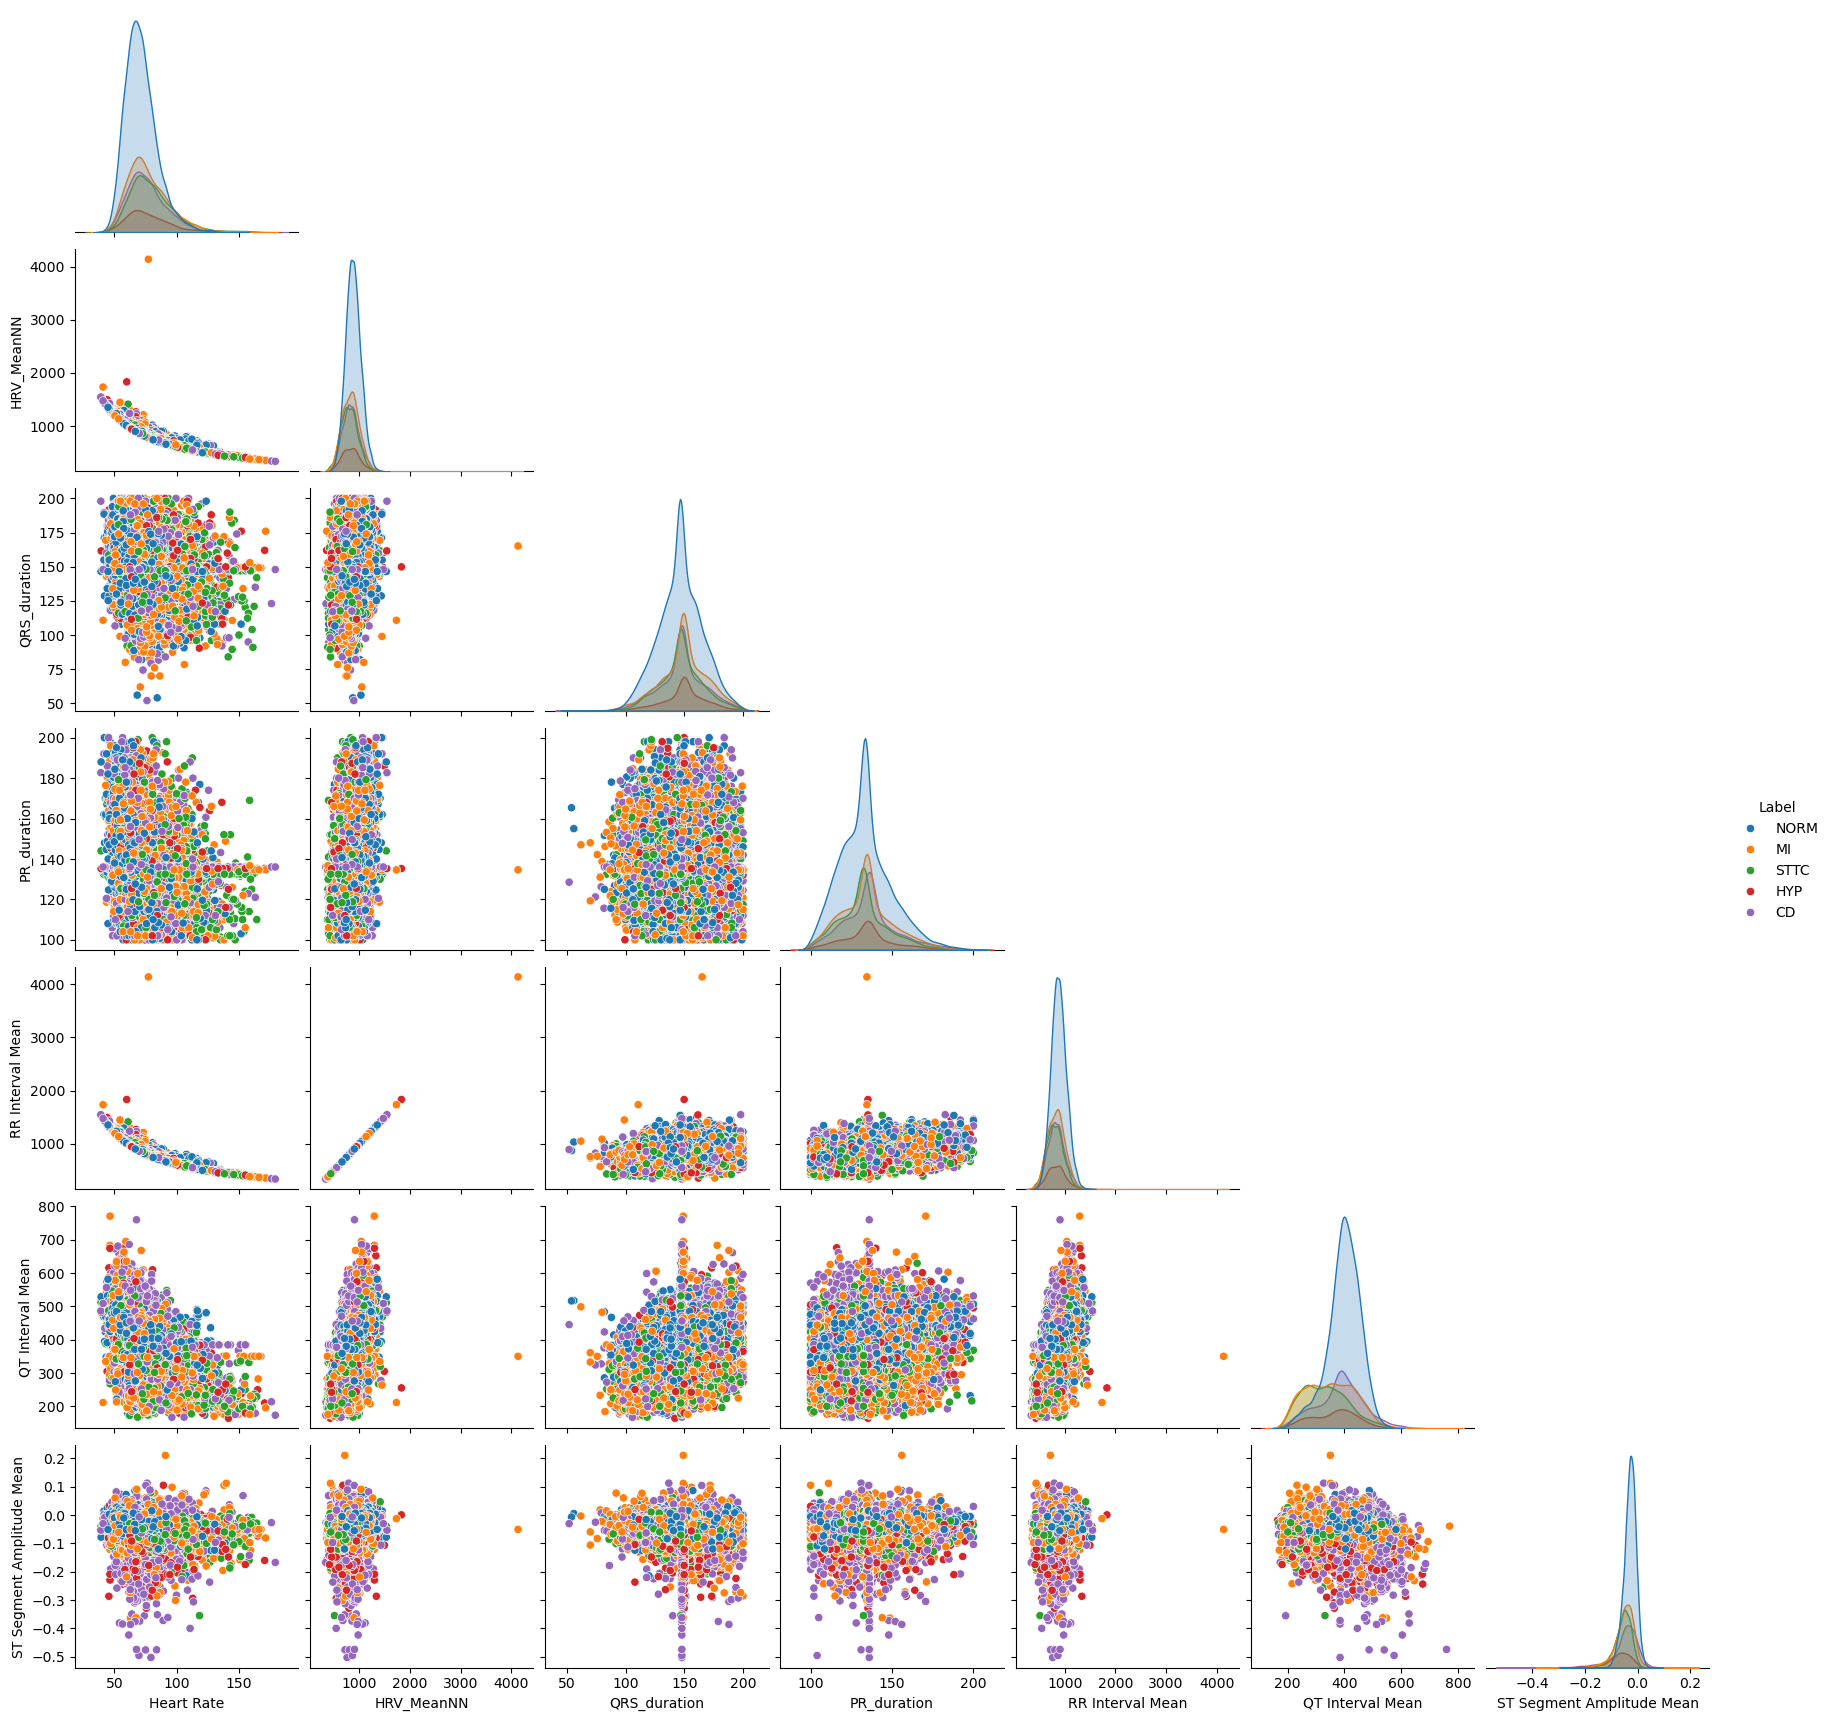

In [45]:
selected_features = ['Heart Rate', 'HRV_MeanNN', 'QRS_duration', 'PR_duration', 'RR Interval Mean', 'QT Interval Mean', 'ST Segment Amplitude Mean']

data = merged_features[selected_features + ['Label']]
sns.pairplot(data, hue='Label', diag_kind="kde", palette="tab10", corner=True)
plt.show()